In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

In [2]:
#read dataset
data = pd.read_csv('/home/user/Documents/#master/Sem_2/AppliedMachineIntelligence/git/group19/data/merged_data/FINALLYmerged_data.csv')
data.head()

Unnamed: 0  Unnamed: 0_x  Country ISO_Code      Date  C1_School closing  \
0           0          1768  Austria      AUT  20200101                0.0   
1           1          1769  Austria      AUT  20200102                0.0   
2           2          1770  Austria      AUT  20200103                0.0   
3           3          1771  Austria      AUT  20200104                0.0   
4           4          1772  Austria      AUT  20200105                0.0   

   C2_Workplace closing  C3_Cancel public events  \
0                   0.0                      0.0   
1                   0.0                      0.0   
2                   0.0                      0.0   
3                   0.0                      0.0   
4                   0.0                      0.0   

   C4_Restrictions on gatherings  C5_Close public transport  ...  \
0                            0.0                        0.0  ...   
1                            0.0                        0.0  ...   
2                            0.0                        0.0  ...   
3                            0.0                        0.0  ...   
4                            0.0                        0.0  ...   

   tests_per_case_y  total_cases_y  total_cases_per_million_y  total_deaths_y  \
0               NaN            0.0                        0.0             0.0   
1               NaN            0.0                        0.0             0.0   
2               NaN            0.0                        0.0             0.0   
3               NaN            0.0                        0.0             0.0   
4               NaN            0.0                        0.0             0.0   

   total_deaths_per_million_y    GDP_x     GDP_y  unemployment_rate   GDP_x.1  \
0                         0.0 -1.27757 -1.048754           6.004297 -1.061523   
1                         0.0 -1.27757 -1.048754           6.004297 -1.061523   
2                         0.0 -1.27757 -1.048754           6.004297 -1.061523   
3                         0.0 -1.27757 -1.048754           6.004297 -1.061523   
4                         0.0 -1.27757 -1.048754           6.004297 -1.061523   

   GDP_y.1  
0  0.99765  
1  0.99765  
2  0.99765  
3  0.99765  
4  0.99765  

[5 rows x 119 columns]

In [3]:
for col in list(data):
    length = len(data)
    
    if not (col == 'TOTAL_CO2_MED' or col == 'new_cases_per_million_y' or col == 'DAY'):

        if type(data[col][140]) is not type(''):
            #print('do nothin')
            #print(type(data[col][140]))
            data[col]=data[col]*1#(data[col]-data[col].min())/(data[col].max()-data[col].min())
            #print('Nomalized')
        
        if int((data[col].isnull().sum()/length)*100) > 0:
            data =data.drop(col,axis=1)
            print('dropped: ', col)

dropped:  new_tests
dropped:  total_tests
dropped:  total_tests_per_thousand
dropped:  new_tests_per_thousand
dropped:  tests_per_case_x
dropped:  positive_rate_x
dropped:  tests_units
dropped:  extreme_poverty
dropped:  handwashing_facilities
dropped:  positive_rate_y
dropped:  tests_per_case_y
dropped:  GDP_y.1


In [18]:
for i in range(data.shape[1]):
    print(i, data.columns[i])

#split data in training and testing set
#we want to predict new_cases per million
X = pd.DataFrame()#data.drop(columns=['new_cases_per_million_x'])
y = data['new_cases_per_million_x']

FEATURES = [*range(5,27),*range(43,55),*range(58,94),103,104,105,106]#[2,10,36, 21, 37,35,29,15]


for ft in FEATURES:
#    print(data.columns[ft])
    X = pd.concat([X, data.iloc[:,ft]], axis=1)
    
    length = len(data)
    data[data.columns[ft]].isnull().sum()
#    print("NaNs in " + data.columns[ft] + ": " + str((data[data.columns[ft]].isnull().sum()/length)*100) +"%" )
#    print(type(data[data.columns[ft]][140]))
#    print(min(data[data.columns[ft]]),'   ',max(data[data.columns[ft]]))
#    print('----------------')

X = X.reset_index()
#print(X.shape)


#choose random state 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=350, shuffle = False)
#print(y_train)
#y_train = np.nan_to_num(y_train)

######################################################

#list of countries:
C_list = data['Country'].unique()

#num of countries:
num_countries = len(data['Country'].unique())

#do a Test/train split:
lim = int(num_countries * 0.7)

X_train = pd.DataFrame()
y_train = pd.DataFrame()

X_test = pd.DataFrame()
y_test = pd.DataFrame()

country_feats = pd.DataFrame

for c in C_list[0:lim]:
    country = data[data['Country']==c]
    
    country_feats = country.iloc[:, FEATURES]
    country_pred = country.iloc[:, 37]
    
    print(country_pred.head())
    print(country_pred.shape)
    X_train = X_train.append(country_feats)
    y_train = pd.concat([y_train, country_pred])
    #y_train = y_train.append(country_pred)
    print(y_train.shape)              

country_feats = pd.DataFrame
        
        
for c in C_list[lim+1:lim+2]:
    country = data[data['Country']==c]
    
    country_feats = country.iloc[:, FEATURES]
    country_pred = country.iloc[:, 37]
    
    X_test = X_test.append(country_feats)
    y_test = pd.concat([y_test, country_pred])
                  
        
print(X_train.head())#

print('##############################')

print(y_train.head())#
X_train_arr = np.asarray(X_train)
y_train_arr = np.asarray(y_train)
X_test_arr = np.asarray(X_test)
y_test_arr = np.asarray(y_test)
#################################################

#print('This should be false:', np.any(np.isnan(X_train)))
#print('This should be True:', np.all(np.isfinite(X_train)))


#print('This should be false:', np.any(np.isnan(X)))
#print('This should be True:', np.all(np.isfinite(X)))


#print('This should be false:', np.any(np.isnan(y_train)))
#print('This should be True:', np.all(np.isfinite(y_train)))


print(X_test_arr.shape)
print(y_test_arr.shape)
print(X_train_arr.shape)
print(y_train_arr.shape)

y_train_arr = np.nan_to_num(y_train_arr)
y_test_arr = np.nan_to_num(y_test_arr)



0 Unnamed: 0
1 Unnamed: 0_x
2 Country
3 ISO_Code
4 Date
5 C1_School closing
6 C2_Workplace closing
7 C3_Cancel public events
8 C4_Restrictions on gatherings
9 C5_Close public transport
10 C6_Stay at home requirements
11 C7_Restrictions on internal movement
12 C8_International travel controls
13 E1_Income support
14 E2_Debt/contract relief
15 E3_Fiscal measures
16 E4_International support
17 H1_Public information campaigns
18 H2_Testing policy
19 H3_Contact tracing
20 H4_Emergency investment in healthcare
21 H5_Investment in vaccines
22 StringencyIndex
23 GovernmentResponseIndex
24 ContainmentHealthIndex
25 EconomicSupportIndex
26 DAY
27 Unnamed: 0_y
28 continent
29 year
30 year_week
31 year_day
32 total_cases_x
33 new_cases_x
34 total_deaths_x
35 new_deaths_x
36 total_cases_per_million_x
37 new_cases_per_million_x
38 total_deaths_per_million_x
39 new_deaths_per_million_x
40 new_tests_smoothed
41 new_tests_smoothed_per_thousand
42 stringency_index
43 population_x
44 population_density
4

In [5]:
len(FEATURES)

74

In [6]:
# gridsearch random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
#from sklearn.ensemble import 

sc = StandardScaler()
rfr = RandomForestRegressor()
gsN = [200]#,250,500,1000]
gsK = [*range(11,13)]#np.arange(1,X_train.shape[1],2)

print(gsK)

### Validation
cval = KFold(n_splits=10, random_state=42)


pipe = Pipeline([('scaler',sc),('forest', rfr)])
model = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())
param_grid = {'regressor__forest__n_estimators': gsN,
              'regressor__forest__max_features': gsK}

search = GridSearchCV(model, param_grid, n_jobs=4,cv=cval,scoring='neg_mean_squared_error',return_train_score=True)
search.fit(X_train_arr, y_train_arr)

print("Best parameter RMSE=%0.3f):" % np.sqrt(-search.best_score_))

print(search.best_params_)

[11, 12]


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best parameter RMSE=0.495):
{'regressor__forest__max_features': 11, 'regressor__forest__n_estimators': 200}


In [7]:
import sklearn as sk

sk.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

This should be false: False
This should be True: True
3278 3278


Text(0.5, 0, 'Residuals')

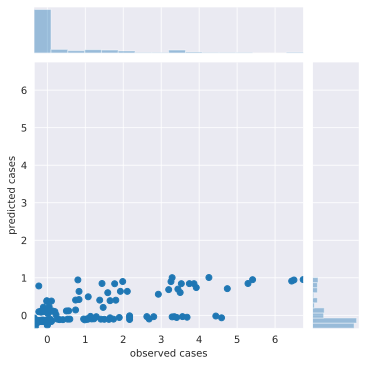

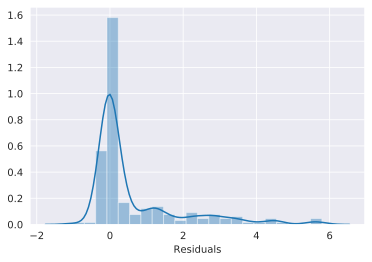

In [19]:
best_forest_estimator = search.best_estimator_




y_pred_train = best_forest_estimator.predict(X_train_arr)
y_pred_test = best_forest_estimator.predict(X_test_arr)

print('This should be false:', np.any(np.isnan(y_pred_train)))
print('This should be True:', np.all(np.isfinite(y_pred_train)))

print(len(y_train_arr), len(y_pred_train))

#print("RMSE training fit: %.03f" %np.sqrt(mean_squared_error(y_train,y_pred_train)))
#print("R2 training fit: %.03f " %r2_score(y_train,y_pred_train))
#print("RMSE prediction: %.03f" %np.sqrt(mean_squared_error(y_test,y_pred_test)))
#print("R2 prediction: %.03f " %r2_score(y_test,y_pred_test))

minlim = y_test_arr.min()
maxlim = y_test_arr.max()



# predicted/actual plot for test set
ax = sns.jointplot(x=y_test_arr,y=y_pred_test, height=5,xlim=(minlim,maxlim),ylim=(minlim,maxlim))
ax.ax_joint.set_xlabel('observed cases')
ax.ax_joint.set_ylabel('predicted cases')
plt.figure()
sns.distplot(np.nan_to_num(y_test_arr-y_pred_test))
plt.xlabel('Residuals')

In [9]:
best_forest_estimator.regressor_['forest'].estimators_[:3]

[DecisionTreeRegressor(max_features=11, random_state=1670690033),
 DecisionTreeRegressor(max_features=11, random_state=1185928249),
 DecisionTreeRegressor(max_features=11, random_state=1011892349)]

In [10]:
#best_forest_estimator.fit(X_train, y_train)
forest = best_forest_estimator.regressor_['forest']

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in FEATURES:#range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, data.drop('new_cases_per_million_x',axis=1).columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances for Random Forest Regression")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), data.drop('new_cases_per_million_x',axis=1).columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
6. General recommendations (0.033623)
7. Humanitarian exemptions (0.031480)
8. ISO_Code (0.027542)
9. Full lockdown (0.022983)
10. Border closure  (0.022525)
11. C1_School closing (0.021155)
12. aged_70_older (0.021060)
13. Curfews (0.020610)
14. Unnamed: 0 (0.020185)
15. Awareness campaigns (0.019117)
16. GovernmentResponseIndex (0.015068)
17. StringencyIndex (0.014744)
18. continent (0.013449)
19. population_density (0.013188)
20. H4_Emergency investment in healthcare (0.013088)
21. Unnamed: 0_y (0.012709)
22. hospital_beds_per_thousand (0.012397)
23. Emergency administrative structures activated or established (0.012286)
24. new_cases_x (0.012228)
25. E1_Income support (0.011926)
26. year_day (0.010914)
27. C3_Cancel public events (0.010665)
44. aged_65_older (0.005733)
45. C5_Close public transport (0.005490)
46. infect_rate (0.005240)
47. Complete border closure (0.004744)
48. Checkpoints within the country (0.004691)
49. year (0.003968)
50. Additional health/docu

IndexError: index 74 is out of bounds for axis 0 with size 74

In [ ]:
import pickle
pkl_filename = "decision_tree_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_tree_estimator, file)

pkl_filename = "random_forest_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_forest_estimator, file)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213]


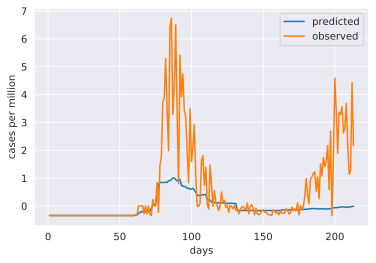

In [20]:
print(np.array(X_test.DAY))
days = np.array(X_test.DAY)
plt.plot(days, y_pred_test)
plt.plot(days, y_test_arr)
#plt.show()
plt.xlabel('days')
plt.ylabel('cases per million')
plt.legend(["predicted", "observed"])

In [ ]:
#from sklearn import preprocessing
#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(y_train)

In [ ]:
kf = KFold(n_splits=3, shuffle=True)

sc = StandardScaler()
rfr = RandomForestRegressor()
gsN = [100,500,1000,2000]
gsK = np.arange(1,X_train.shape[1],2)

i = 0
for train_index, test_index in kf.split(X):
    
    # split into training and testing data
    X_train = X.iloc[train_index,:]
    y_train = y[train_index]
    
    # not needed but we still do it for completeness
    X_test = X.iloc[test_index,:]
    y_test = y[test_index]
    
    i = i+1
    print("For fold: %s" %(i))
    
    pipe = Pipeline([('scaler',sc),('forest', rfr)])
    model = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())
    param_grid = {'regressor__forest__n_estimators': gsN,
                  'regressor__forest__max_features': gsK}
    search = GridSearchCV(model, param_grid, n_jobs=-1,cv=cval,scoring='neg_mean_squared_error',return_train_score=True)
    search.fit(X_train, y_train)
    print("Best parameter RMSE=%0.3f):" % np.sqrt(-search.best_score_))
    print(search.best_params_)
    
    
    best_forest_estimator = search.best_estimator_
    best_forest_estimator.fit(X_train, y_train)

    # retrieve random forest estimator object from the transformedTargetRegressor
    forest = best_forest_estimator.regressor_['forest']

    importances = forest.feature_importances_
    
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, data.drop('new_cases_per_million',axis=1).columns[indices[f]], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.title("Feature importances for Random Forest Regression - Fold %s " %(i))
    plt.bar(range(X.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), data.drop('new_cases_per_million',axis=1).columns[indices],rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()